<i> Multiple Linear Regression Assignment | DS-C33</i>

---

# Bike Sharing Case Study
<i>Build a multiple linear regression model for the prediction of demand for shared bikes</i>

---
Submitted By: [Bhanu Pratap Singh](https://www.linkedin.com/in/bpst/)

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider `BoomBikes` has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to `accelerate its revenue` as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to `understand the demand for shared bikes` among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and `stand out from other service providers and make huge profits`.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various `meteorological surveys and people's styles`, the service provider firm has gathered a large dataset on `daily bike demands` across the American market based on some factors. 

### Reading and Understanding the Data

In [1]:
# Importing all required packages
import pandas as pd
import numpy as np
from datetime import date

# For visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Train Test Split
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import MinMaxScaler

# Modeling
import statsmodels.api as sm

# Regression packages
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Scores
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
df = pd.read_csv('day.csv')
df.shape

(730, 16)

In [3]:
# Let's explore the top 5 rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking casual, registered and cnt column
df['casual'][0] + df['registered'][0] == 985

True

Since `cnt` is derived column i.e. sum of `casual` and `registered` columns, it does not make sense to include them as a predictor variable, so we can drop `casual` and `registered` along with `instant` column

In [5]:
# Drop columns
df.drop(['instant','casual','registered'], axis=1, inplace=True)
df.shape

(730, 13)

In [6]:
# Let's explore the top 5 rows
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
# Let's check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


As we can, here we don't have any null values. Also `dteday` column is of object type, let's convert into date time.

In [8]:
# Converting dteday to Pandas datetime format
df['dteday'] = pd.to_datetime(df['dteday'])

In [9]:
# Deriving "days since the bike sharing started"
df['startday'] = date(2017, 12, 31)
df['startday'] = pd.to_datetime(df['startday'])
df['day'] = df['dteday'] - df['startday']
df.drop('startday', axis=1, inplace=True)

In [10]:
# Let's explore the top 5 rows
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1 days
1,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,32 days
2,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,60 days
3,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,91 days
4,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,121 days


In [11]:
# Cleaning days
df['day'] = df['day'].astype(str)
df['day'] = df['day'].map(lambda x: x.replace('days','').strip())
df['day'] = df['day'].astype(int)

In [12]:
# Let's explore the top 5 rows
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1
1,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,32
2,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,60
3,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,91
4,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,121


In [13]:
# Drop dteday column
df.drop(['dteday'], axis=1, inplace=True)

In [14]:
# Making 'season' categories more readable -> (1:spring, 2:summer, 3:fall, 4:winter)
df.season.replace([1,2,3,4], ['spring', 'summer', 'fall', 'winter'], inplace=True)
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
# Making 'weathersit' more readable -> numbers are missleading, there is no order here however from numbers is seems like so
df.weathersit.replace([1,2,3,4], ['clear', 'mistcloudy', 'lightsnowrain', 'heavysnowrain'], inplace=True)
df.weathersit.value_counts()

clear            463
mistcloudy       246
lightsnowrain     21
Name: weathersit, dtype: int64

In [16]:
# Let's explore the top 5 rows
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,0,1,0,1,1,mistcloudy,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,1,0,2,1,mistcloudy,14.902598,17.68695,69.6087,16.652113,801,32
2,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349,60
3,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562,91
4,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600,121


### Visualising the Data

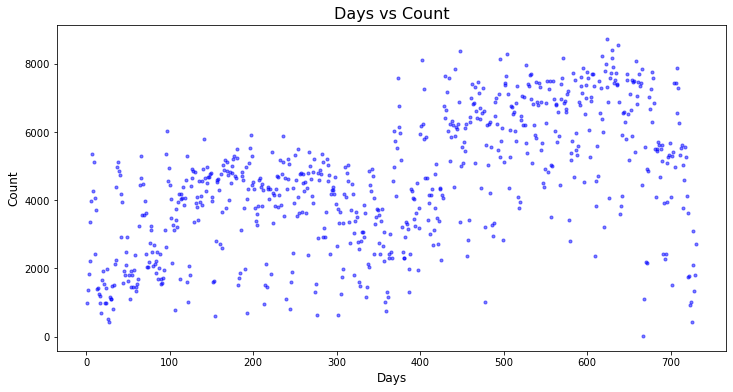

In [17]:
# Scatter Plot (days vs cnt)
colors = np.array([0.0, 0.0, 1.0]).reshape(1,-1)
area = np.pi*3
plt.figure(figsize=(12,6))
plt.scatter(df.day, df.cnt, s=area, c=colors, alpha=0.5)
plt.title('Days vs Count', fontsize=16)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

As per problem statement, we can clearly see a trend where first the cnt increased and then dropped (see at 700)

In [18]:
# Dropping day column
df.drop(['day'], axis=1, inplace=True)

#### Visualising Numeric Variables
Let's make a pairplot of the numeric variables

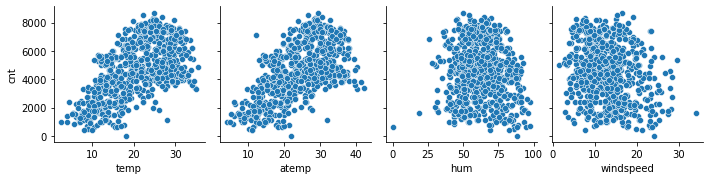

In [19]:
# Let's plot pairplot for few columns
sns.pairplot(data=df, x_vars=['temp','atemp','hum','windspeed'], y_vars='cnt');

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

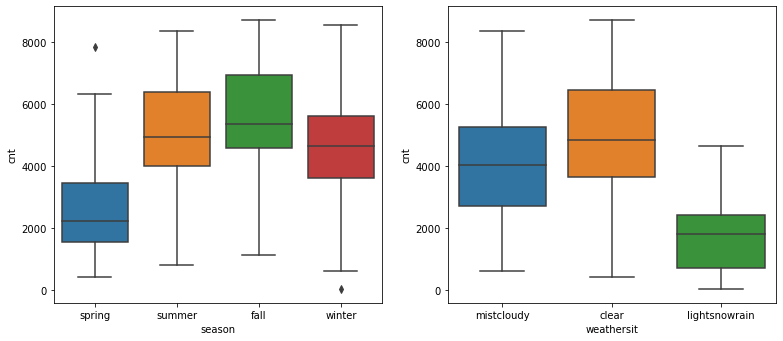

In [20]:
# Visualising categorical variable -> subplots
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.boxplot(x='season', y='cnt', data=df)

plt.subplot(2, 3, 2)
sns.boxplot(x='weathersit', y='cnt', data=df)

plt.show()

In [21]:
# Checking weekdays value counts
df.weekday.value_counts()

1    105
2    105
0    104
3    104
4    104
5    104
6    104
Name: weekday, dtype: int64

On checking with day on 1-1-2018, it came out to be `Monday`, hence concluded that weekdays are codes as mentioned below,
* Sunday: 0
* Monday: 1
* Tuesday: 2
* Wednesday: 3
* Thrusday: 4
* Friday: 5
* Saturday: 6

### Data Preparation

In [22]:
# Create dummy variables
dummyvars = pd.get_dummies(df[['season', 'weathersit']], drop_first=True)
dummyvars.head()

,season_spring,season_summer,season_winter,weathersit_lightsnowrain,weathersit_mistcloudy
0,1,0,0,0,1
1,1,0,0,0,1
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [23]:
# Combine dummyvars with dataframe
df = pd.concat([df, dummyvars], axis=1)
df.drop(['season', 'weathersit'], axis=1, inplace=True)
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_lightsnowrain,weathersit_mistcloudy
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [24]:
# Rename columns
df.rename(columns={'weathersit_lightsnowrain': 'weathersitlightsnowrain','weathersit_mistcloudy': 'weathersitmistcloudy',
                   'season_spring': 'seasonspring', 'season_summer': 'seasonsummer', 
                   'season_winter': 'seasonwinter'}, inplace=True)
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,seasonspring,seasonsummer,seasonwinter,weathersitlightsnowrain,weathersitmistcloudy
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


### Splitting the Data into Training and Testing Sets

In [25]:
# Train Test Split
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 15)
(220, 15)


#### Rescaling the Features
We will use MinMax scaling

In [26]:
# Create scaler
scaler = MinMaxScaler()

In [27]:
# Scale, fit, transform train set
# Apply scaler() to all the columns except the '1-0' and 'dummy' variables
num_vars = ['mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,seasonspring,seasonsummer,seasonwinter,weathersitlightsnowrain,weathersitmistcloudy
576,1,0.545455,0,0.500000,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,0.181818,0,0.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1
728,1,1.000000,0,0.166667,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,0.272727,0,0.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1
111,0,0.272727,0,0.000000,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1


In [28]:
# Scale, transform test set
# Apply scaler() to all the columns except the '1-0' and 'dummy' variables
num_vars = ['mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,seasonspring,seasonsummer,seasonwinter,weathersitlightsnowrain,weathersitmistcloudy
184,0,0.545455,1,0.500000,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1
535,1,0.454545,0,0.666667,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0
299,0,0.818182,0,1.000000,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,1
221,0,0.636364,0,0.833333,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0
152,0,0.454545,0,1.000000,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0


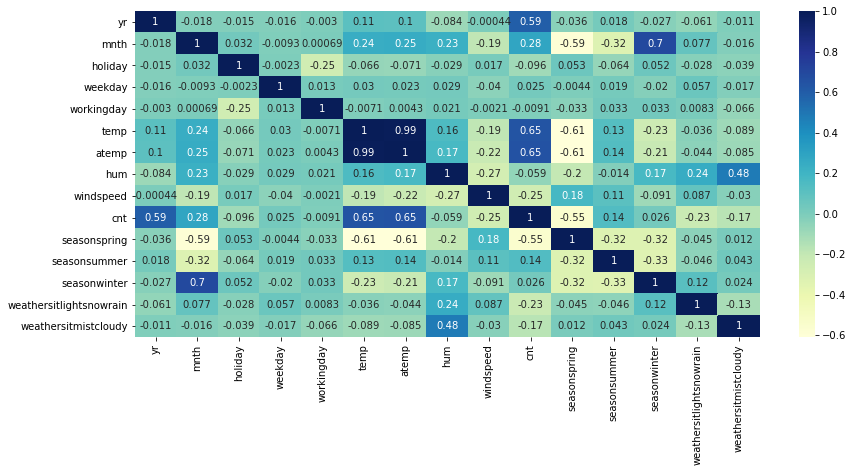

In [29]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(14, 6))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu');

As we can see, `yr`, `temp` and `atemp` seems to be correlated to `cnt` the most, however `temp` and `atemp` have very high correlation `0.99`, so we will only considering `temp` as both carry same information.

### Building a linear model

#### Create Helper Functions

In [30]:
# Function to fit Ordinary Least Squares (OLS) model
def fit_OLS(predictors):
    # Putting feature variable to X
    X = df_train[predictors]

    # Putting response variable to y
    y = df_train['cnt']
    
    # Unlike SKLearn, statsmodels don't automatically fit a constant, 
    # so you need to use the method sm.add_constant(X) in order to add a constant.
    X_lm = sm.add_constant(X)
    
    # Create a fitted model
    lm = sm.OLS(y, X_lm).fit()
    
    # Return model
    return lm, X, X_lm, y

In [31]:
# Function to show VIF: Variance Inflation Factor
def show_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [32]:
# Get predictors
get_predictors = lambda x, predictors: [predictor for predictor in predictors if predictor not in ['cnt',x]]

#### Fitting OLS Model

In [33]:
# Fit model
predictors = df_train.columns.tolist()
lm, X, X_lm, y = fit_OLS(get_predictors('', predictors))
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     171.5
Date:                Tue, 26 Oct 2021   Prob (F-statistic):          1.41e-179
Time:                        22:40:08   Log-Likelihood:                 489.42
No. Observations:                 510   AIC:                            -948.8
Df Residuals:                     495   BIC:                            -885.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

As we can see `atemp` is not significant so dropping it

In [34]:
# Drop atemp and fit model
predictors = get_predictors('atemp', predictors)
lm, X, X_lm, y = fit_OLS(predictors)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.0
Date:                Tue, 26 Oct 2021   Prob (F-statistic):          1.12e-180
Time:                        22:40:08   Log-Likelihood:                 489.32
No. Observations:                 510   AIC:                            -950.6
Df Residuals:                     496   BIC:                            -891.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [35]:
# Drop weekday and fit model
predictors = get_predictors('weekday', predictors)
lm, X, X_lm, y = fit_OLS(predictors)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     199.9
Date:                Tue, 26 Oct 2021   Prob (F-statistic):          1.95e-181
Time:                        22:40:08   Log-Likelihood:                 488.37
No. Observations:                 510   AIC:                            -950.7
Df Residuals:                     497   BIC:                            -895.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [36]:
# Drop mnth and fit model
predictors = get_predictors('mnth', predictors)
lm, X, X_lm, y = fit_OLS(predictors)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.3
Date:                Tue, 26 Oct 2021   Prob (F-statistic):          1.62e-182
Time:                        22:40:08   Log-Likelihood:                 488.13
No. Observations:                 510   AIC:                            -952.3
Df Residuals:                     498   BIC:                            -901.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [37]:
# Drop workingday and fit model
predictors = get_predictors('workingday', predictors)
lm, X, X_lm, y = fit_OLS(predictors)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.2
Date:                Tue, 26 Oct 2021   Prob (F-statistic):          8.27e-183
Time:                        22:40:08   Log-Likelihood:                 485.99
No. Observations:                 510   AIC:                            -950.0
Df Residuals:                     499   BIC:                            -903.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [38]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
show_VIF(X)

                  Features    VIF
3                      hum  26.98
2                     temp  14.79
4                windspeed   4.64
5             seasonspring   3.71
7             seasonwinter   3.04
9     weathersitmistcloudy   2.28
6             seasonsummer   2.24
0                       yr   2.07
8  weathersitlightsnowrain   1.24
1                  holiday   1.04


In [39]:
# Drop hum and fit model
predictors = get_predictors('hum', predictors)
lm, X, X_lm, y = fit_OLS(predictors)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.1
Date:                Tue, 26 Oct 2021   Prob (F-statistic):          2.84e-181
Time:                        22:40:08   Log-Likelihood:                 479.48
No. Observations:                 510   AIC:                            -939.0
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [40]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
show_VIF(X)

                  Features   VIF
3                windspeed  4.60
2                     temp  3.56
0                       yr  2.07
4             seasonspring  1.95
5             seasonsummer  1.80
6             seasonwinter  1.61
8     weathersitmistcloudy  1.53
7  weathersitlightsnowrain  1.08
1                  holiday  1.04


### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [41]:
# Get predictions
y_cnt_pred = lm.predict(X_lm)

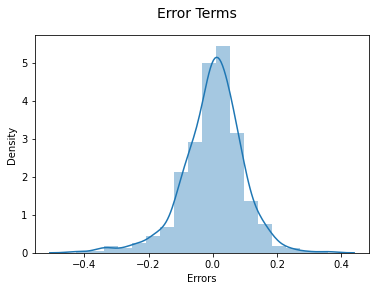

In [42]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y - y_cnt_pred), bins = 18)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 14)  
# X-label
plt.xlabel('Errors', fontsize=10)     
plt.show()

### Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [43]:
# Putting feature variable to X
X_test = df_test[predictors]

# Putting response variable to y
y_test = df_test['cnt']

In [44]:
# Adding constant variable to test dataframe
X_test_m1 = sm.add_constant(X_test)

In [45]:
# Making predictions using the fourth model
y_pred_m1 = lm.predict(X_test_m1)

### Model Evaluation

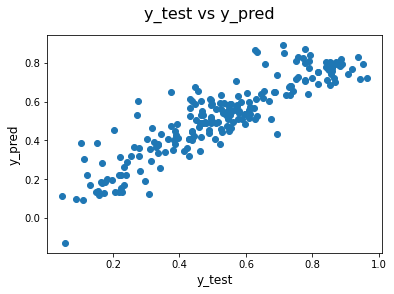

In [46]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m1)
# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize=16)  
# X-label
plt.xlabel('y_test', fontsize=12)                        
plt.ylabel('y_pred', fontsize=12)      
plt.show()

In [47]:
# Printing the predictor and their respective coefficent combinations
', '.join([str((v1,v2)) for v1,v2 in zip([round(val,3) for val in lm.params],[name for name in lm.params.index])])

"(0.222, 'const'), (0.234, 'yr'), (-0.087, 'holiday'), (0.466, 'temp'), (-0.155, 'windspeed'), (-0.083, 'seasonspring'), (0.038, 'seasonsummer'), (0.075, 'seasonwinter'), (-0.278, 'weathersitlightsnowrain'), (-0.075, 'weathersitmistcloudy')"

We can see that the equation of our best fitted line is:

$ cnt = 0.234  \times  yr - 0.087  \times  holiday + 0.466 \times temp - 0.155 \times windspeed - 0.083 \times seasonspring + 0.038 \times seasonsummer + 0.075 \times seasonwinter - 0.278 \times weathersitlightsnowrain - 0.075 \times weathersitmistcloudy + 0.222 $

### Checking the R-squared on the test set

In [48]:
# Returns R Squared Score
r_squared = r2_score(y_test, y_pred_m1)
r_squared

0.8013092375478267

### Looking at the RMSE

In [49]:
# Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred_m1))

0.09746925490347955

---

# Building our model - Using RFE (Recursive Feature Elimination)
<i>An efficient approach for eliminating features from a training dataset for feature selection</i>

---

In [50]:
# Importing dataset
df_rfe = pd.read_csv('day.csv')
df_rfe.shape

(730, 16)

In [51]:
# Dropping column
df_rfe.drop(['instant','dteday'], axis=1, inplace=True)

In [52]:
# Making 'season' categories more readable -> (1:spring, 2:summer, 3:fall, 4:winter)
df_rfe.season.replace([1,2,3,4], ['spring', 'summer', 'fall', 'winter'], inplace=True)
df_rfe.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [53]:
# Making 'weathersit' more readable -> numbers are missleading, there is no order here however from numbers is seems like so
df_rfe.weathersit.replace([1,2,3,4], ['clear', 'mistcloudy', 'lightsnowrain', 'heavysnowrain'], inplace=True)
df_rfe.weathersit.value_counts()

clear            463
mistcloudy       246
lightsnowrain     21
Name: weathersit, dtype: int64

### Data Preparation

In [54]:
# Create dummy variables
dummyvars = pd.get_dummies(df_rfe[['season', 'weathersit']], drop_first=True)
dummyvars.head()

,season_spring,season_summer,season_winter,weathersit_lightsnowrain,weathersit_mistcloudy
0,1,0,0,0,1
1,1,0,0,0,1
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [55]:
# Combine dummyvars with dataframe
df_rfe = pd.concat([df_rfe, dummyvars], axis=1)
df_rfe.drop(['season', 'weathersit'], axis=1, inplace=True)
df_rfe.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,weathersit_lightsnowrain,weathersit_mistcloudy
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


In [56]:
# Rename Columns
df_rfe.rename(columns={'weathersit_lightsnowrain': 'weathersitlightsnowrain','weathersit_mistcloudy': 'weathersitmistcloudy',
                   'season_spring': 'seasonspring', 'season_summer': 'seasonsummer', 
                   'season_winter': 'seasonwinter'}, inplace=True)
df_rfe.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,seasonspring,seasonsummer,seasonwinter,weathersitlightsnowrain,weathersitmistcloudy
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


In [57]:
# Dropping columns
df_rfe.drop(['casual', 'registered'], axis=1, inplace=True)

### Splitting the Data into Training and Testing Sets

In [58]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train_rfe, df_test_rfe = train_test_split(df_rfe, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features
We will use MinMax scaling

In [59]:
# Create Scaler
scaler_rfe = MinMaxScaler()

In [60]:
# Scale, fit, transform train set
# Apply scaler() to all the columns except the '1-0' and 'dummy' variables
num_vars = ['mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train_rfe[num_vars] = scaler_rfe.fit_transform(df_train_rfe[num_vars])
df_train_rfe.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,seasonspring,seasonsummer,seasonwinter,weathersitlightsnowrain,weathersitmistcloudy
653,1,0.818182,0,0.500000,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0
576,1,0.545455,0,0.500000,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,0.181818,0,0.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1
728,1,1.000000,0,0.166667,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,0.272727,0,0.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1


#### Dividing into X_train and y_train sets for the model building

In [61]:
# Putting feature variable to X_train
X_train = df_train_rfe

# Putting response variable to y_train
y_train = df_train_rfe.pop('cnt')

In [62]:
# Function to get columns
def get_rfe_columns(n_features, display=False):
    # Define Estimator
    lm = LinearRegression()
    
    # Fit Model
    lm.fit(X_train, y_train)
    
    # Running RFE
    rfe = RFE(lm, n_features)
    
    # Fit RFE
    rfe = rfe.fit(X_train, y_train)
    
    # Print if flag is set
    if display:
        print(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
    
    # Get Columns
    col = X_train.columns[rfe.support_]
    return col

In [63]:
# Function to fit OLS model
def fit_OLS_RFE(columns):
    # Creating X_test dataframe with RFE selected variables
    X_train_rfe = X_train[columns]
    
    # Adding a constant variable  
    X_train_rfe = sm.add_constant(X_train_rfe)
    
    # Running the linear model
    lm = sm.OLS(y_train,X_train_rfe).fit()
    
    # Return Model
    return lm, X_train_rfe, X_train_rfe

In [64]:
# Function to compute VIF
def get_vif_RFE(X):
    # Drop const columns
    X = X.drop(['const'], axis=1)
    
    # Create Dataframe
    vif = pd.DataFrame()
    
    # Compute VIF
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Building a linear model

In [65]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [66]:
# Let's see the summary of our linear model
predictors_rfe = list(get_rfe_columns(10))
lm_rfe, X_train_rfe, X_train_rfe_lm = fit_OLS_RFE(predictors_rfe)
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Tue, 26 Oct 2021   Prob (F-statistic):          4.78e-183
Time:                        22:40:09   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [67]:
# Get VIF
get_vif_RFE(X_train_rfe)

,Features,VIF
3,hum,27.02
2,temp,14.79
4,windspeed,4.64
5,seasonspring,3.71
7,seasonwinter,3.05
9,weathersitmistcloudy,2.28
6,seasonsummer,2.24
0,yr,2.07
8,weathersitlightsnowrain,1.24
1,holiday,1.04


In [68]:
# Re-build Model - drop column
predictors_rfe = [predictor for predictor in predictors_rfe if predictor != 'hum']
lm_rfe, X_train_rfe, X_train_rfe_lm = fit_OLS_RFE(predictors_rfe)
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.0
Date:                Tue, 26 Oct 2021   Prob (F-statistic):          1.42e-181
Time:                        22:40:09   Log-Likelihood:                 479.80
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     500   BIC:                            -897.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [69]:
# Get VIF
get_vif_RFE(X_train_rfe)

,Features,VIF
3,windspeed,4.59
2,temp,3.56
0,yr,2.07
4,seasonspring,1.96
5,seasonsummer,1.79
6,seasonwinter,1.62
8,weathersitmistcloudy,1.52
7,weathersitlightsnowrain,1.08
1,holiday,1.04


### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [70]:
# Get predictions
y_cnt_pred_rfe = lm_rfe.predict(X_train_rfe)

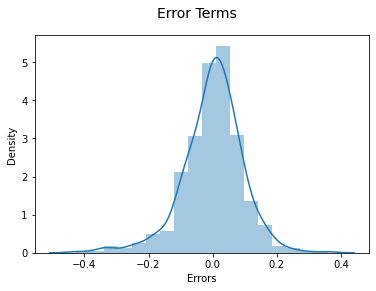

In [71]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_cnt_pred_rfe), bins = 18)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 14)  
# X-label
plt.xlabel('Errors', fontsize=10)     
plt.show()

### Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. `lm_rfe` model.

In [72]:
# Transform Numeric Columns
num_vars = ['mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test_rfe[num_vars] = scaler_rfe.transform(df_test_rfe[num_vars])

In [73]:
# Putting feature variable to X
X_test = df_test_rfe[predictors_rfe]

# Putting response variable to y
y_test = df_test_rfe['cnt']

In [74]:
# Adding constant variable to test dataframe
X_test_m_rfe = sm.add_constant(X_test)

In [75]:
# Making predictions using the fourth model
y_pred_m_rfe = lm_rfe.predict(X_test_m_rfe)

### Model Evaluation

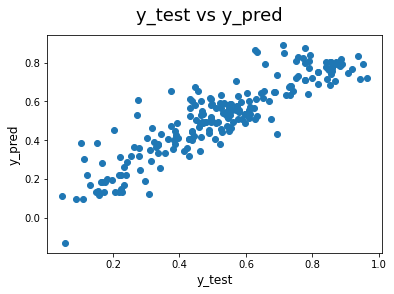

In [76]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m_rfe)
# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize = 18)  
# X-label
plt.xlabel('y_test', fontsize = 12)                        
plt.ylabel('y_pred', fontsize = 12)      
plt.show()

### Comparing predictors and their coeff

#### For Previous Model - Predictors without RFE

In [77]:
# Printing the predictor and their respective coefficent combinations
', '.join([str((v1,v2)) for v1,v2 in zip([round(val,3) for val in lm.params],[name for name in lm.params.index])])

"(0.222, 'const'), (0.234, 'yr'), (-0.087, 'holiday'), (0.466, 'temp'), (-0.155, 'windspeed'), (-0.083, 'seasonspring'), (0.038, 'seasonsummer'), (0.075, 'seasonwinter'), (-0.278, 'weathersitlightsnowrain'), (-0.075, 'weathersitmistcloudy')"

#### For Previous Model - Predictors with RFE

In [78]:
# Printing the predictor and their respective coefficent combinations
', '.join([str((v1,v2)) for v1,v2 in zip([round(val,3) for val in lm_rfe.params],[n for n in lm_rfe.params.index])])

"(0.222, 'const'), (0.234, 'yr'), (-0.088, 'holiday'), (0.467, 'temp'), (-0.155, 'windspeed'), (-0.082, 'seasonspring'), (0.037, 'seasonsummer'), (0.076, 'seasonwinter'), (-0.279, 'weathersitlightsnowrain'), (-0.076, 'weathersitmistcloudy')"

We can see that the equation of our best fitted line is:

$ cnt = 0.234  \times  yr - 0.088  \times  holiday + 0.467 \times temp - 0.155 \times windspeed - 0.082 \times seasonspring + 0.037 \times seasonsummer + 0.076 \times seasonwinter - 0.279 \times weathersitlightsnowrain - 0.076 \times weathersitmistcloudy + 0.222 $

### Checking the R-squared on the test set

In [79]:
# Returns R Squared Score
r_squared_rfe = r2_score(y_test, y_pred_m_rfe)
r_squared_rfe

0.8009724887482659

### Looking at the RMSE

In [80]:
# Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred_m_rfe))

0.0972263981182103

### Conclusion

So as we can see with both the approach our final best fit model is same.